# Baseball Case Study
Problem Statement: This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

In [131]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

# Importing the dataset

In [132]:
# Reading the csv file from dataset

baseball = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
baseball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Our data Set contains 16 features and one label
# Label
        W-wins 
# Features
    R-Runs
    AB-At Bats
    H- Hits
    2B-Doubles
    3B-Triples
    HR-Homeruns
    BB- Walks
    SO-Strikeouts
    SB-Stolen Bases
    RA-Runs Allowed
    ER-Erned Runs
    ERA-Earned Run Average
    CG-Complete Games
    SHO-Shutouts
    SV-Saves
    E-Error


Our problems is to predict wins from given targets

# Exploratory Data Analysis (EDA)

In [133]:
# checking shape of our Data
baseball.shape

(30, 17)

So there are 30 rows and 17 features

In [134]:
# Now we will check the data types of our data
baseball.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

All features have numeric data type so we can proceed further

In [135]:
# Now we will check any Null value is there
baseball.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

So there are no null values are present in our data we can move forward

In [136]:
# Now let us check is there any duplicate data is present in our data if present then we will remove the same
baseball.drop_duplicates(inplace=True)

In [137]:
baseball.shape

(30, 17)

So there is no duplicate data present in our data. let us check further 

In [138]:
#now check how any catagorical dat is present in our data 
baseball.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [139]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.2 KB


In [140]:
# Now check whether any space present in our label
df.loc[df['W']==" "]

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


In [141]:
# now check the statistical description of our data
baseball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


This gives the statistical information of the dataset. 
Maximum different in data is present in SO-strikeouts it ranges from 973 to 1518, that means there may be outliers present so we will look it later.

The values of data have high range so we will we have to standardise the data. Now we will move further processing
Count all features is 30


# EDA Conclusion

This is a Regression Problem since the Label column ("W") has Continuous type of Data.

No need to encode the data.

Missing data and duplicate data not found.

Check for Outliers and Skewness.


# Data Visualisation

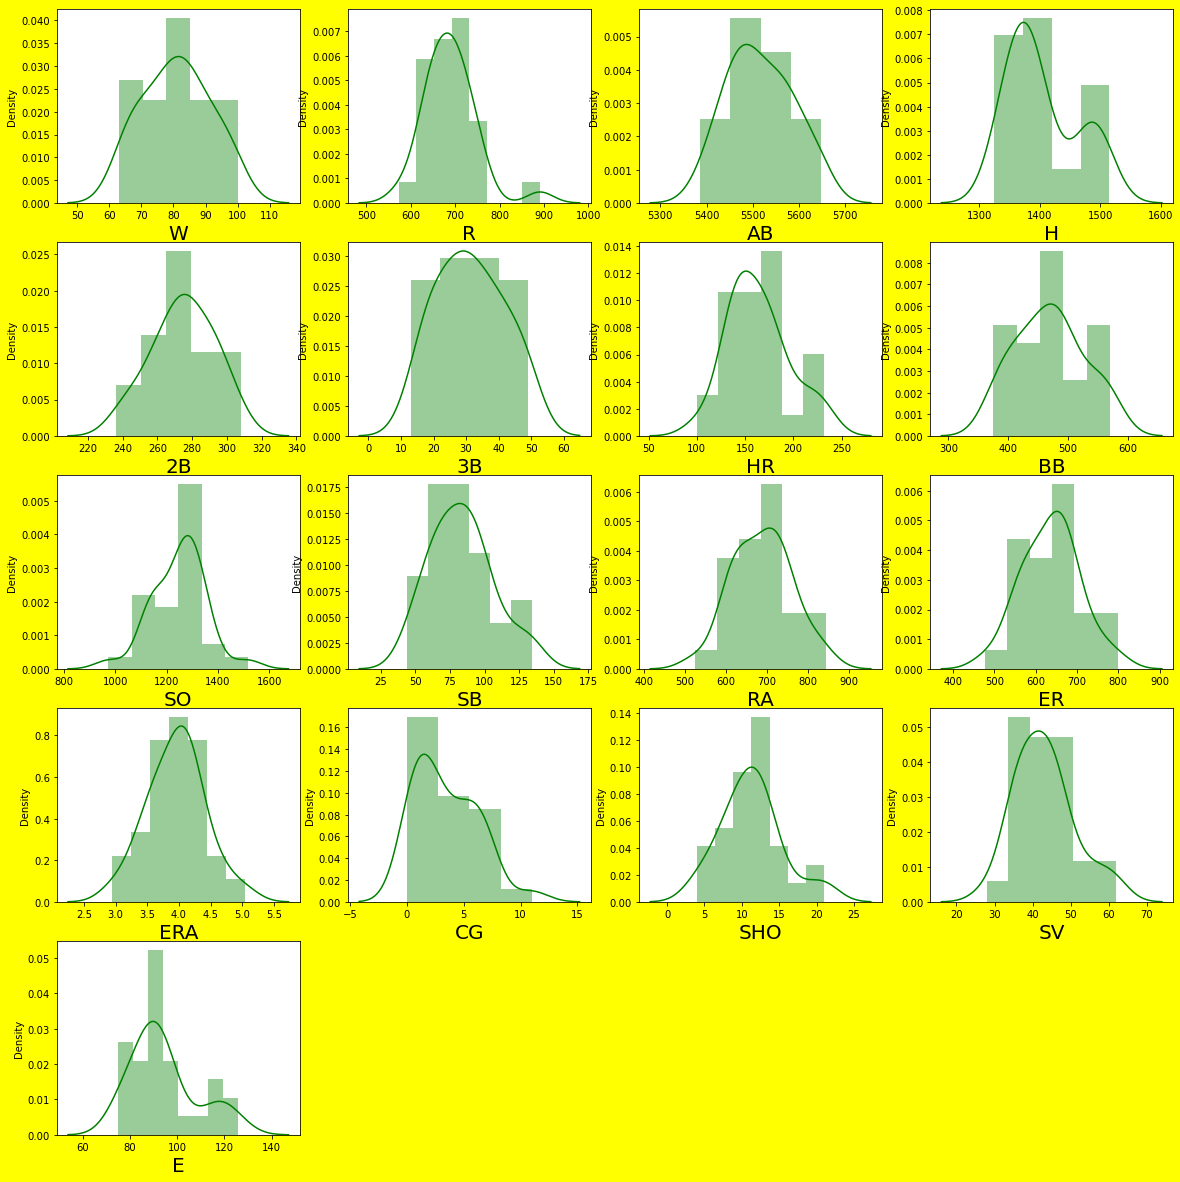

In [142]:
# Checking how the data has been distriubted in each column
plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber = 1

for column in baseball:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(baseball[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


From the distribution graphs above, it can be seen that most of the columns are normally distributed and few of them have skewness.
The target column ['W'] is normally distributed and there is no skewness present.
The column 'R'(Runs) is normal. 
The same differences can be seen in the columns 'BB','SO','RA','ERA'and'SHO'. Eventhough they looks normal but has skewness.
The column('AB') looks normally distributed and has no skewness. The value of AB mostly lies between 5300-5650.
The column 'H','HR','SV','E','CG' are not normal and the they are skewed to the right.
The doubles rate('2B') is between 230-300 and it looks normally distributed but bit skewness is present.
The distribution of the data present in the columns '3B','SB', and 'ER' is normal and has no skewness. 



# Now we will check Bivarient plots as there is no Catagorical feature univarient plots are not required

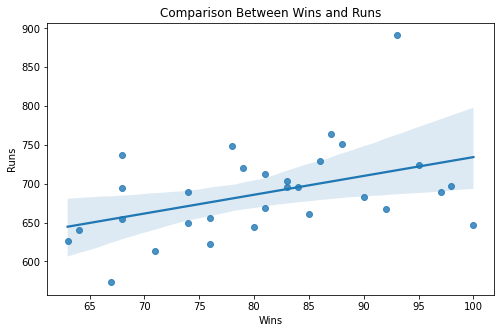

In [143]:
#1st We will plot Label wins and runs

plt.figure(figsize=(8,5))
plt.title("Comparison Between Wins and Runs")
sns.regplot(x='W',y='R',data=baseball)
plt.xlabel("Wins",fontsize=10)
plt.ylabel("Runs",fontsize=10)
plt.show()

From this we can find that there is very small linear relationship between the variables.

# Now we will find the relationship between all features with label

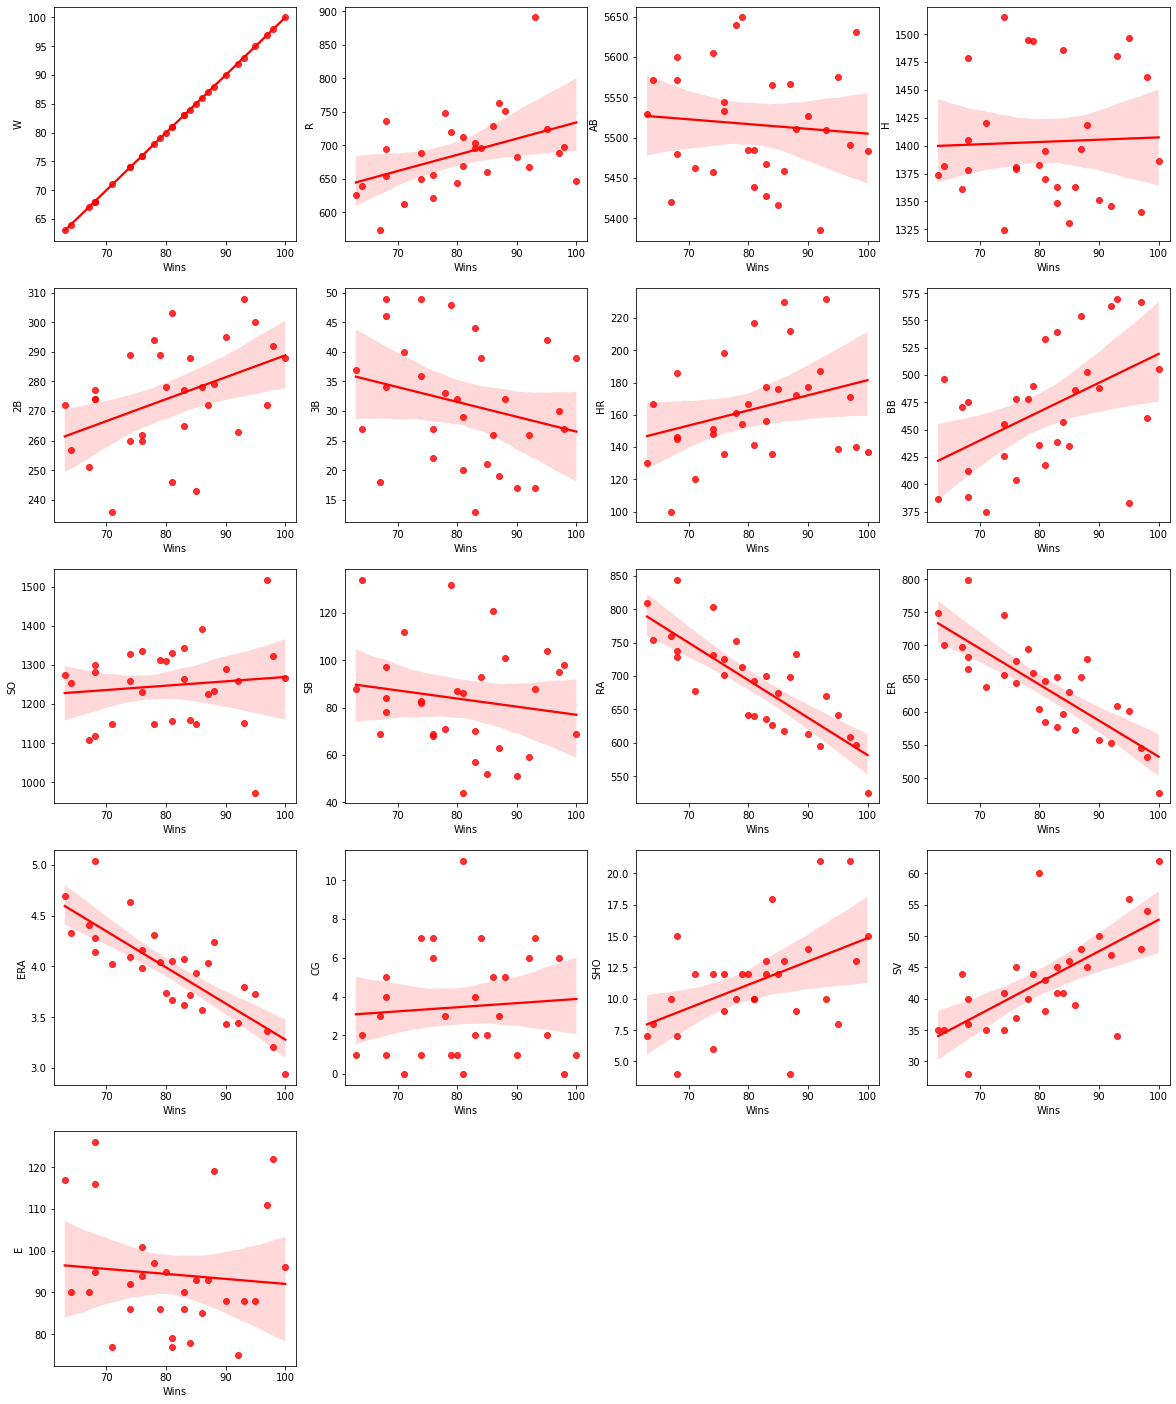

In [144]:
plt.figure(figsize=(20,25))
p=1
for i in baseball:
    if p<=17:
        plt.subplot(5,4,p)
        sns.regplot(x='W',y=i,data=baseball,color='r')
        plt.xlabel("Wins")
        plt.ylabel(i)
    p+=1
    
plt.show()
        

From this figuare we can identify that some features have high positive linear relationship like('SV','BB')

Some feature there is positive linear relation but not that much like('R','2B','HR','SHO')

Some features like 'E','AB,'SB are lightly negatively related

Some features like 'ERA',RA,ER, have higly negatvie relation with label, 

Some features like CG and H doesnot have any relation with Label.

# So No we will plot Label vs CG and Label VS H to see any relation exist

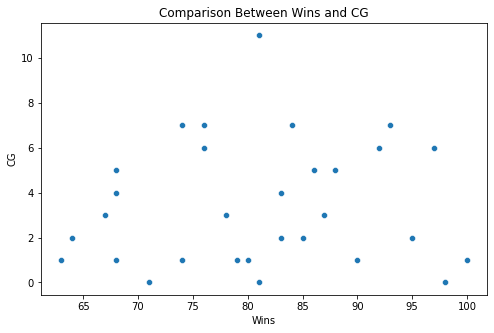

In [145]:
plt.figure(figsize=(8,5))
plt.title("Comparison Between Wins and CG")
sns.scatterplot(x='W',y='CG',data=baseball)
plt.xlabel("Wins",fontsize=10)
plt.ylabel("CG",fontsize=10)
plt.show()

From this fiture we can clearly  Notice that tere is no relationship between CG-Complete Games and wins

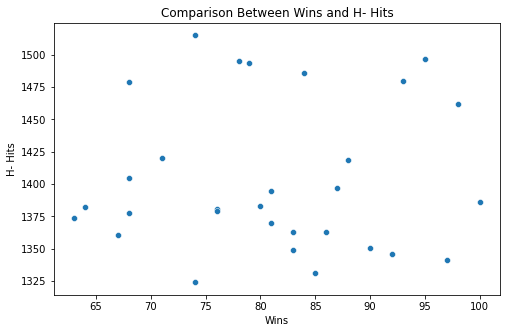

In [146]:
plt.figure(figsize=(8,5))
plt.title("Comparison Between Wins and H- Hits")
sns.scatterplot(x='W',y='H',data=baseball)
plt.xlabel("Wins",fontsize=10)
plt.ylabel("H- Hits",fontsize=10)
plt.show()

This figure also note that there no relationship between H- Hits and Wins

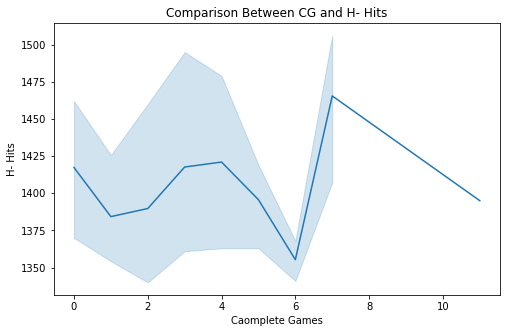

In [147]:
# Now we will check ay relation between CG and Hints
plt.figure(figsize=(8,5))
plt.title("Comparison Between CG and H- Hits")
sns.lineplot(x='CG',y='H',data=baseball)
plt.xlabel("Caomplete Games",fontsize=10)
plt.ylabel("H- Hits",fontsize=10)
plt.show()

# Either we can remove these features or proceed . 1st we will proceed without removing data

Now We will check the relation between ER and ERA


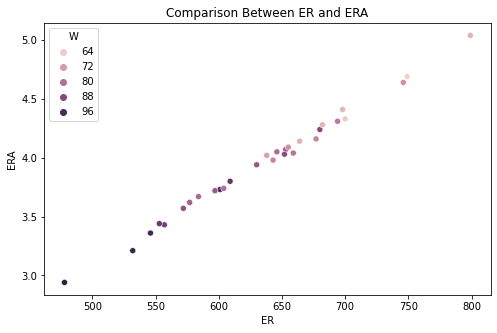

In [148]:
plt.figure(figsize=(8,5))
plt.title("Comparison Between ER and ERA")
sns.scatterplot(x='ER',y='ERA',data=baseball,hue='W')
plt.xlabel("ER",fontsize=10)
plt.ylabel("ERA",fontsize=10)
plt.show()

This shows that ER and ERA are highly related So we can remove any one of the feature

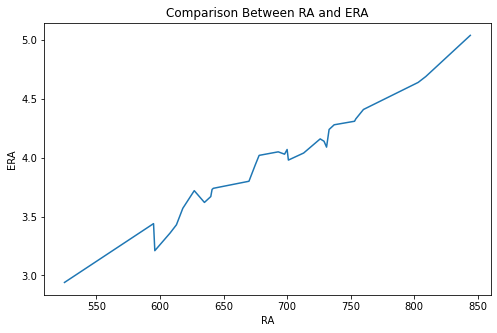

In [149]:
# let us check the relation between RA and ERA
plt.figure(figsize=(8,5))
plt.title("Comparison Between RA and ERA")
sns.lineplot(x='RA',y='ERA',data=baseball)
plt.xlabel("RA",fontsize=10)
plt.ylabel("ERA",fontsize=10)
plt.show()

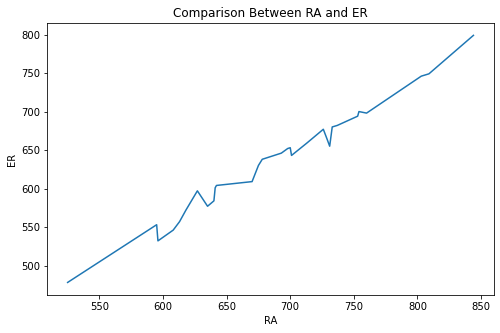

In [150]:
plt.figure(figsize=(8,5))
plt.title("Comparison Between RA and ER")
sns.lineplot(x='RA',y='ER',data=baseball)
plt.xlabel("RA",fontsize=10)
plt.ylabel("ER",fontsize=10)
plt.show()

So We will remove ERA from our data As the graphs showa that the have high multi co linearity


In [151]:
baseball=baseball.drop('ERA',axis=1)# Removing ERA from data as high colinearity with ER an RA

In [152]:
baseball.shape

(30, 16)

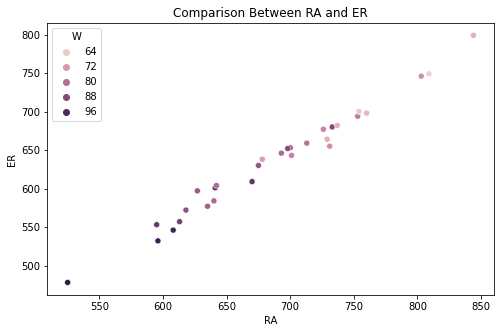

In [153]:
# let us check the relation between RA and ER
plt.figure(figsize=(8,5))
plt.title("Comparison Between RA and ER")
sns.scatterplot(x='RA',y='ER',data=baseball,hue='W')
plt.xlabel("RA",fontsize=10)
plt.ylabel("ER",fontsize=10)
plt.show()

# Best Feature Selection
As there are so many features and Some of them does not have any relation ad some of them have high negative linear relation we will find 12 best parameters using SelectPercentile Feature selection method

In [154]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
x=baseball.drop('W',axis=1)
y=baseball.W

In [155]:
spercentile=SelectPercentile(score_func=chi2,percentile=90)
spercentile=spercentile.fit(x,y)
bestf=spercentile.get_support(indices=True)# Getting best features

In [86]:
feature=x.columns[bestf]
baseball_new=x[feature]
baseball_new['W']=baseball['W']
baseball_new # Our new data frame containing 12 fatures and 

,R,H,3B,HR,BB,SO,SB,RA,ER,CG,SV,E,W
0,724,1497,42,139,383,973,104,641,601,2,56,88,95
1,696,1349,44,156,439,1264,70,700,653,2,45,86,83
2,669,1395,29,141,533,1157,86,640,584,11,38,79,81
3,622,1381,27,136,404,1231,68,701,643,7,37,101,76
4,689,1515,49,151,455,1259,83,803,746,7,35,86,74
5,891,1480,17,232,570,1151,88,670,609,7,34,88,93
6,764,1397,19,212,554,1227,63,698,652,3,48,93,87
7,713,1370,20,217,418,1331,44,693,646,0,43,77,81
8,644,1383,32,167,436,1310,87,642,604,1,60,95,80
9,748,1495,33,161,478,1148,71,753,694,3,40,97,78


In [80]:
feature # These are the best 12 feature

Index(['R', 'H', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'CG', 'SV', 'E'], dtype='object')

These are the features that we removed 'AB','2B','SHO'

In [88]:
#Now We will chech the corelation between features using Corr()
baseball_new.corr()

,R,H,3B,HR,BB,SO,SB,RA,ER,CG,SV,E,W
R,1.000000,0.482856,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,0.232042,-0.096380,-0.023262,0.430751
H,0.482856,1.000000,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.147955,-0.130371,-0.033173,0.037612
3B,-0.070072,0.478694,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,-0.065898,-0.142370,0.126678,-0.251118
HR,0.671283,-0.090855,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,0.156502,-0.028540,-0.207597,0.307407
BB,0.402452,-0.118281,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,0.462478,0.099445,-0.075685,0.484342
SO,-0.054726,-0.398830,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.093418,0.126297,0.155133,0.111850
SB,0.081367,0.413444,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,-0.020783,-0.183418,0.079149,-0.157234
RA,-0.041623,0.224324,0.314125,-0.103903,-0.416445,-0.129745,0.132290,1.000000,0.991018,-0.016659,-0.616224,0.198996,-0.812952
ER,-0.041245,0.252489,0.340225,-0.085922,-0.452663,-0.161612,0.143068,0.991018,1.000000,-0.020221,-0.589663,0.136921,-0.809435
CG,0.232042,0.147955,-0.065898,0.156502,0.462478,-0.093418,-0.020783,-0.016659,-0.020221,1.000000,-0.367766,-0.140047,0.080533


We will visualize the same using heat map then  we can clearly identify the datials easily

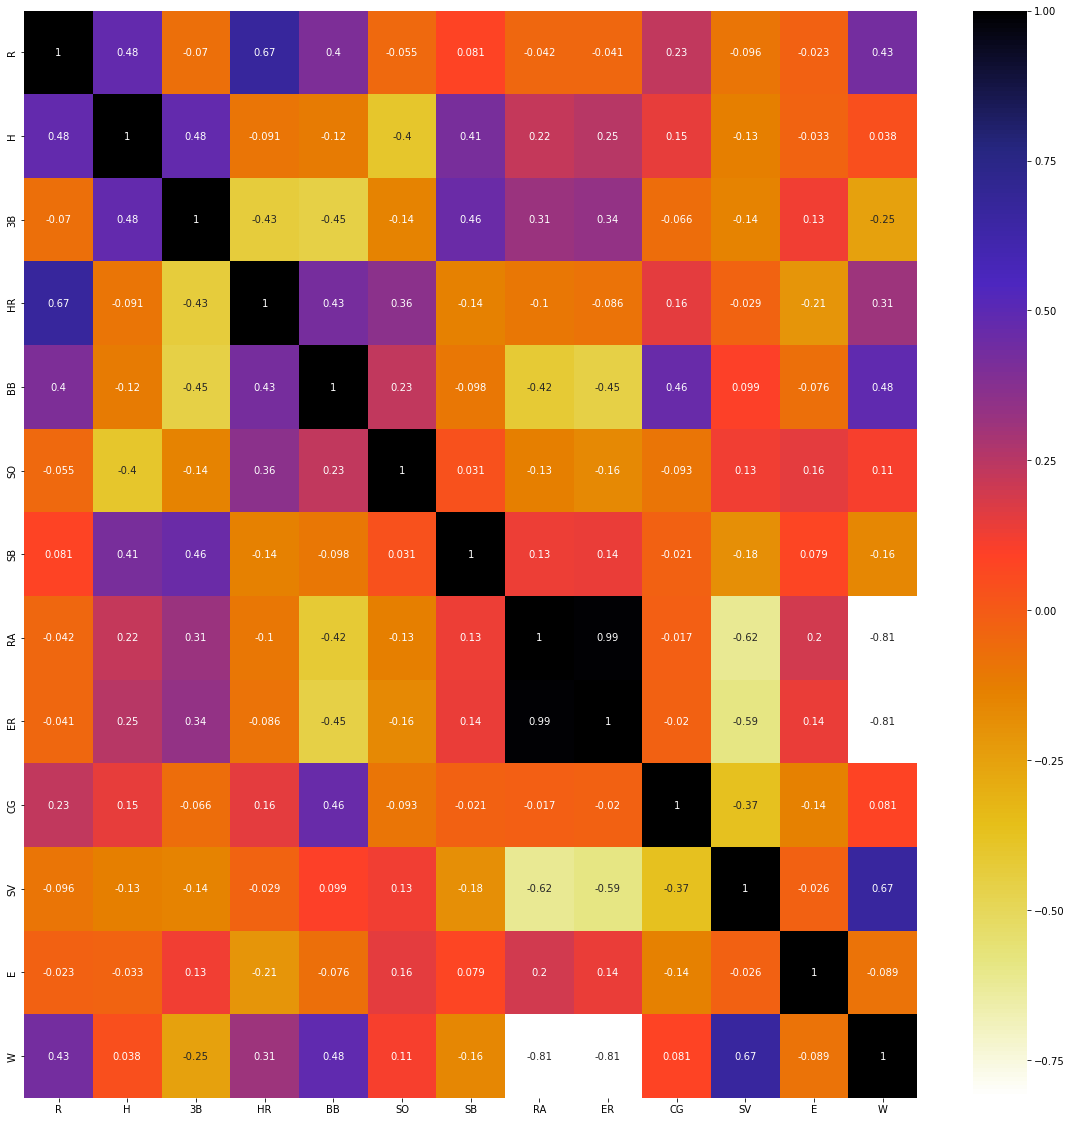

In [96]:
plt.figure(figsize=(20,20))
sns.heatmap(baseball_new.corr(),annot=True,cmap='CMRmap_r')
plt.show()

From this we can clear identify that RA and ER have high multicoliearity as we pointed earilier.


The Label 'W' is positively correlated with following  features 'R','H','HR','BB','SO',CG','SV'

The Label 'W' is Negatively corelated with '3B','SB','RA','ER' od this ER and RA were high negative corelation.



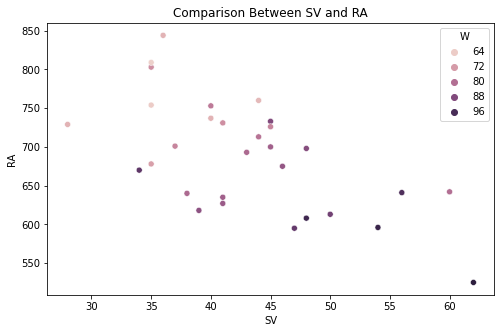

In [99]:
# SV ANd RA were positevily corelated letus visualize
plt.figure(figsize=(8,5))
plt.title("Comparison Between SV and RA")
sns.scatterplot(x='SV',y='RA',data=baseball,hue='W')
plt.xlabel("SV",fontsize=10)
plt.ylabel("RA",fontsize=10)
plt.show()

Similarly SV and ER also positevilty related.

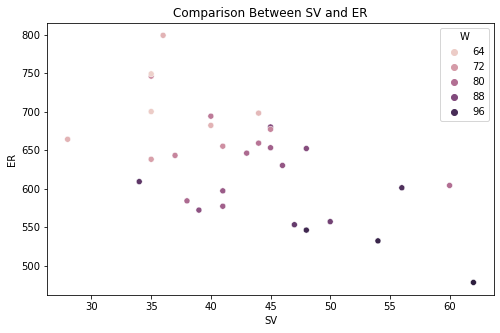

In [100]:
# SV ANd RA were positevily corelated letus visualize
plt.figure(figsize=(8,5))
plt.title("Comparison Between SV and ER")
sns.scatterplot(x='SV',y='ER',data=baseball,hue='W')
plt.xlabel("SV",fontsize=10)
plt.ylabel("ER",fontsize=10)
plt.show()

From these we can again conclude that ER and RA have hugh multicoliniarity, We we will deal with the same using VIF later

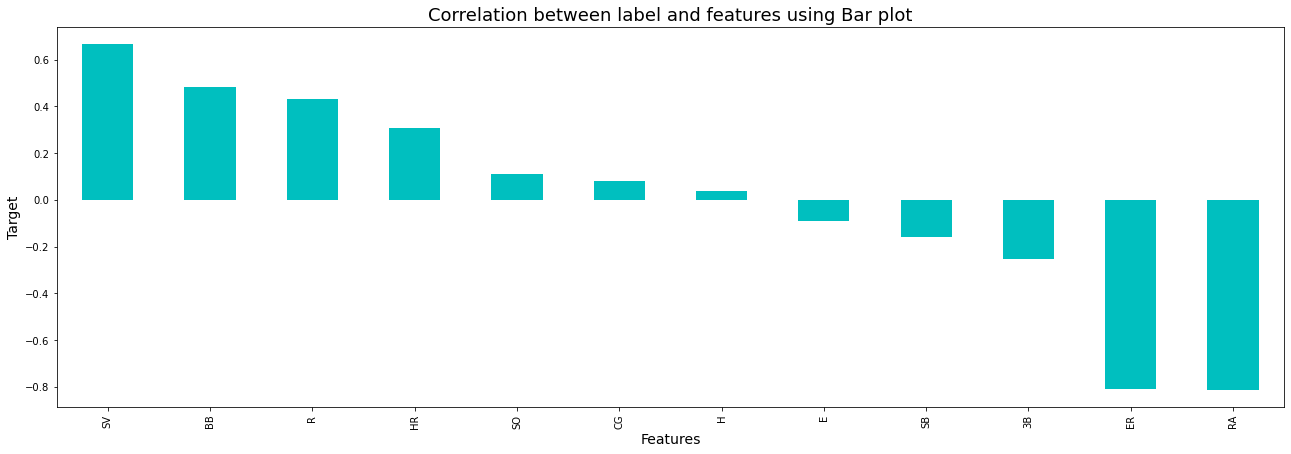

In [98]:
# Let us visualise the the correlation between LAbel and other features
plt.figure(figsize=(22,7))
baseball_new.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and features using Bar plot',fontsize=18)
plt.show()

As explained ER and RA have high negative coliniarity with label. 1st seven features have positive relation with label, last 5 features have -ve corelation

# Visualization Conclusion
We have identified that CG and H does not have any relationship with the Label

RA, ER and ERA Are highly related to each other.(ie high multicolinearity exits)

ER And RA highly negative relation with Label, ERA we already droped.

# Outliers Detection 

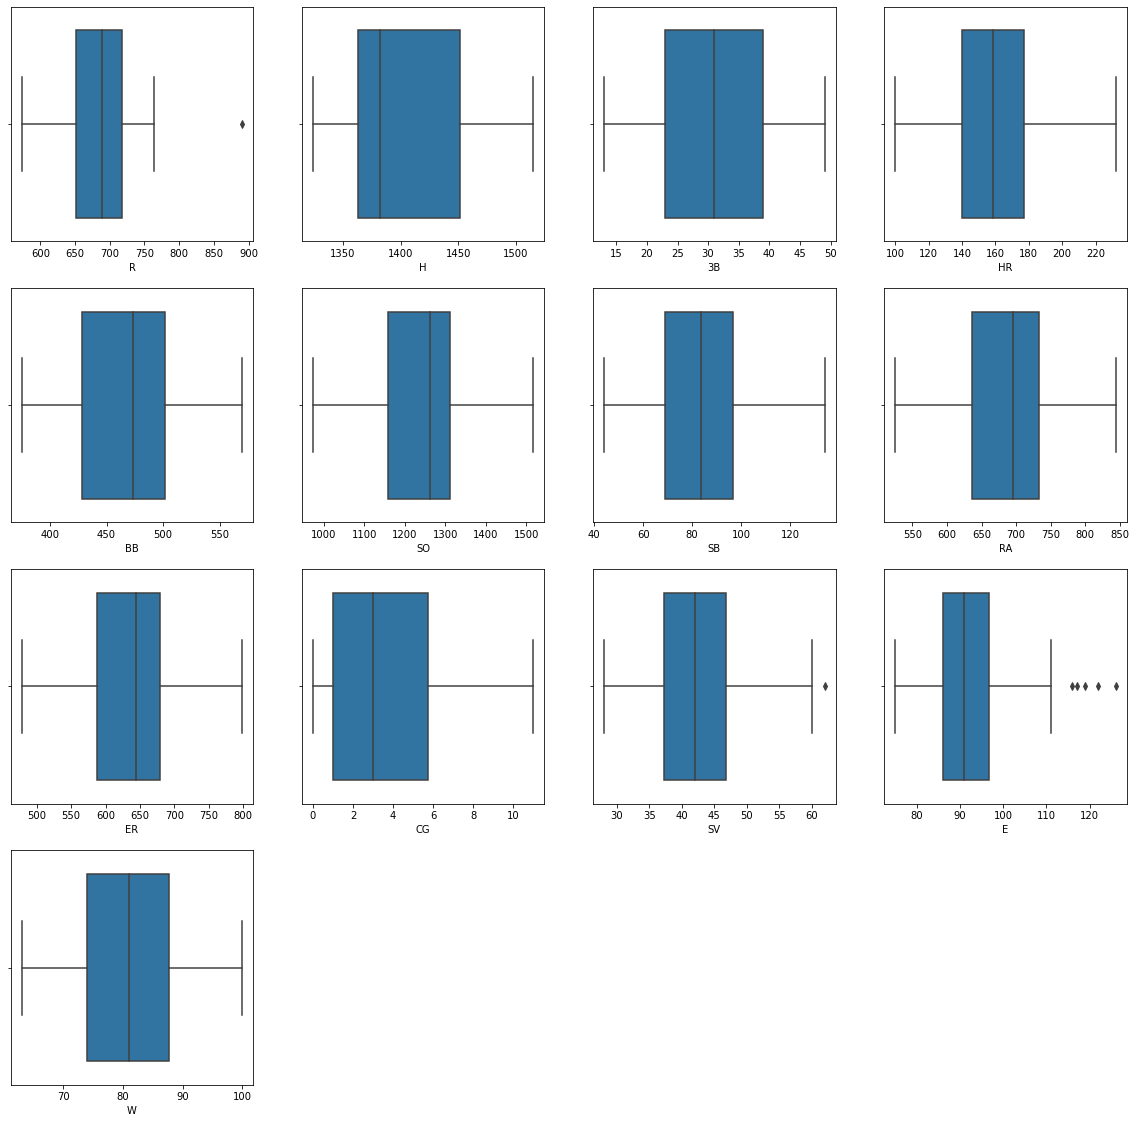

In [103]:
# Ist plot the box plot for outlier detection
plt.figure(figsize=(20,25))
p=1
for i in baseball_new:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(baseball_new[i])
        plt.xlabel(i)
      
    p+=1
    
plt.show()

# We can observe that the columns 'R','SV' and 'E' have outliers. 
# So, removing the outliers using zscore and IQR techniques before building the model and selected best one


In [105]:
from scipy.stats import zscore
out_features=baseball_new[['R','SV','E']]
z=np.abs(zscore(out_features))
z

,R,SV,E
0,0.619078,1.671607,0.461470
1,0.134432,0.249879,0.607197
2,0.332906,0.654856,1.117242
3,1.146419,0.784104,0.485758
4,0.013270,1.042600,0.607197
5,3.509647,1.171848,0.461470
6,1.311430,0.637623,0.097152
7,0.428681,0.008617,1.262970
8,0.765626,2.188598,0.048576
9,1.034489,0.396360,0.194303


In [106]:
# Now removing the data above Zscore and creating new DF
new_df = baseball_new[(z<3).all(axis=1)]

new_df.shape# New data after removing outliers

(29, 13)

In [107]:
# old data
baseball_new.shape

(30, 13)

In [108]:
#So total loss in data is
(30-29)/30*100

3.3333333333333335

It is reasonable loss of data now we will check with IQR method


In [110]:
# 1st quantile
Q1=out_features.quantile(0.25)

# 3rd quantile
Q3=out_features.quantile(0.75)

# IQR
IQR=Q3 - Q1

new_df1=baseball_new[~((baseball_new < (Q1 - 1.5 * IQR)) |(baseball_new > (Q3 + 1.5 * IQR))).any(axis=1)]

In [111]:
new_df1.shape

(23, 13)

In [112]:
##So total loss in data is
(30-23)/30*100

23.333333333333332

In [113]:
# As this is very small dataset loss of 23% is not acceptable. so let us continue with zscore method
baseball_new=new_df

# Now checking Skewness


In [114]:
baseball_new.skew()

R    -0.215364
H     0.783772
3B    0.090124
HR    0.450862
BB    0.151193
SO   -0.233815
SB    0.494966
RA    0.018155
ER    0.018461
CG    0.854980
SV    0.627480
E     0.840271
W     0.119013
dtype: float64

As we noted earlier in visualization H, CG, SV, E have high skewness so we have to reduce the skewness

In [115]:
skewed_col=['H','CG','SV','E']
from sklearn.preprocessing import PowerTransformer # importing power transform for removal of skewness
scaler = PowerTransformer(method='yeo-johnson')

In [117]:
baseball_new[skewed_col] = scaler.fit_transform(baseball_new[skewed_col].values)
baseball_new[skewed_col].head()

,H,CG,SV,E
0,4.163336e-16,-0.307098,1.532753,-0.348265
1,-2.498002e-16,-0.307098,0.312020,-0.540820
2,0.000000e+00,2.011315,-0.664137,-1.326125
3,-8.326673e-17,1.264463,-0.820689,0.650818
4,4.718448e-16,1.264463,-1.149165,-0.540820


In [118]:
baseball_new.skew() # New Skewness

R    -0.215364
H     0.000000
3B    0.090124
HR    0.450862
BB    0.151193
SO   -0.233815
SB    0.494966
RA    0.018155
ER    0.018461
CG   -0.045947
SV   -0.000925
E     0.065585
W     0.119013
dtype: float64

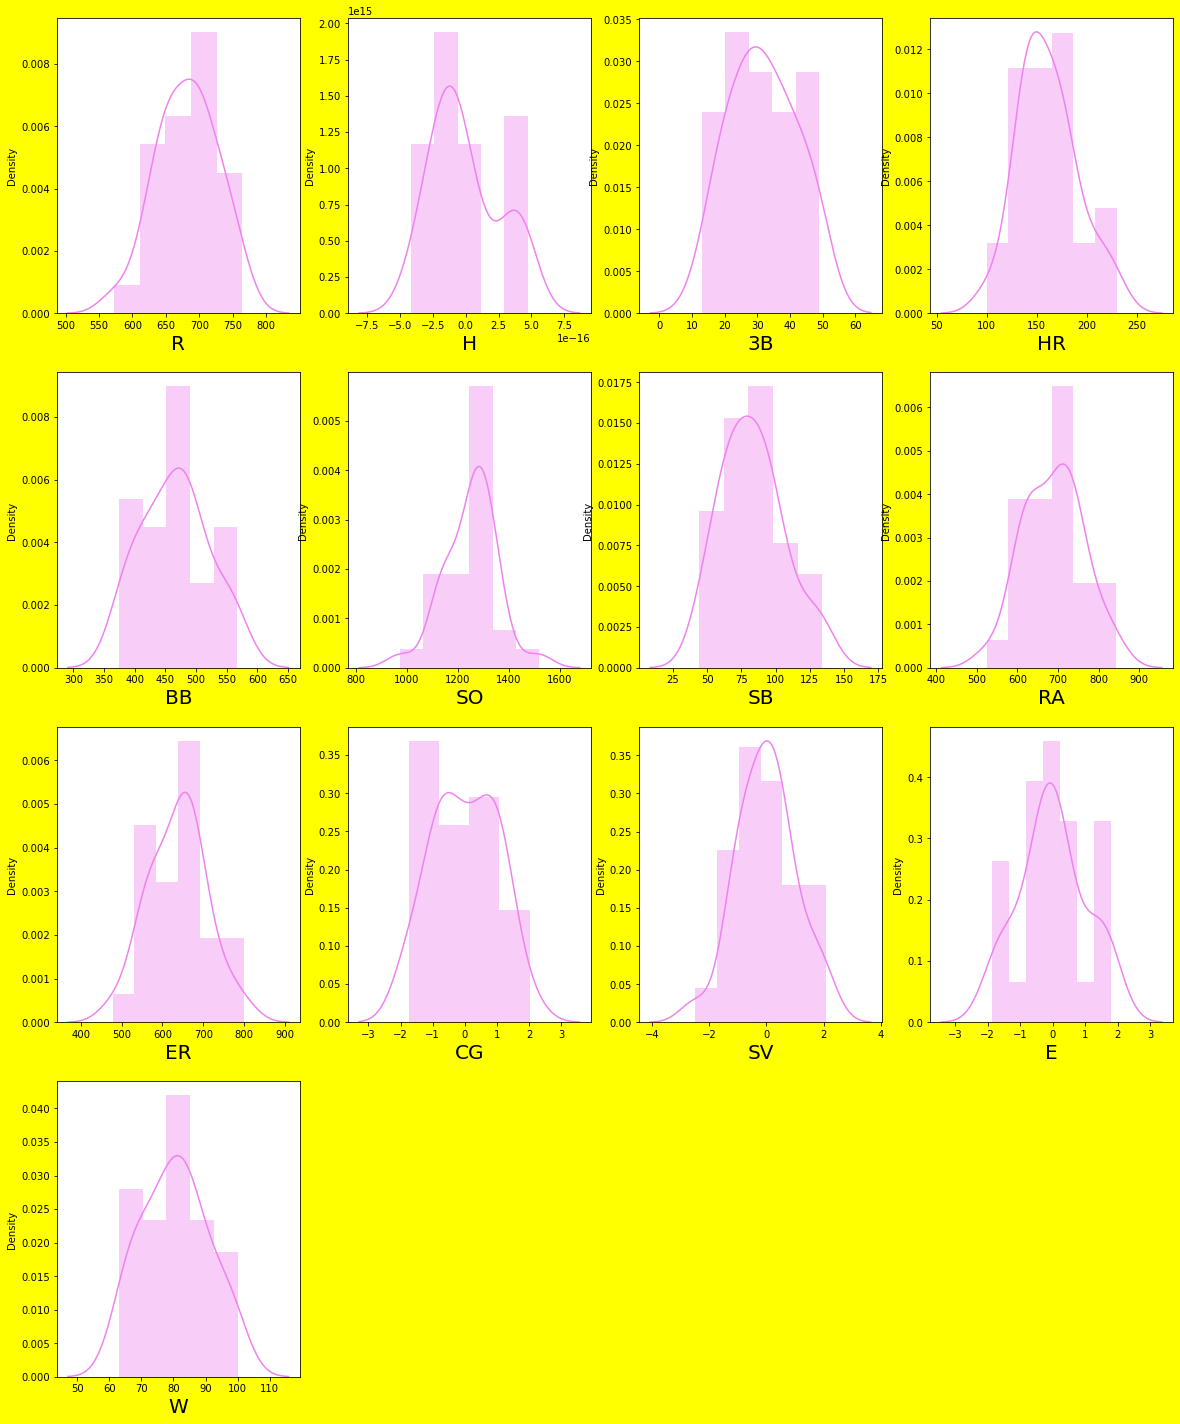

In [124]:
# Let us visualize again
plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber = 1

for column in baseball_new:
    if plotnumber<=13:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(baseball_new[column],color='Violet')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

From this we can clearily note that the skewness were removed. So let us continue

## Data Preprocessing

In [156]:
#Separating the independent and target variables into x and y

x = baseball_new.drop("W", axis=1)
y = baseball_new["W"]

print("Feature Dimension=",x.shape)
print("Label Dimension", y.shape)

Feature Dimension= (29, 12)
Label Dimension (29,)


# Standard Scalarization of our data


In [157]:
# importing standard scalar
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,R,H,3B,HR,BB,SO,SB,RA,ER,CG,SV,E
0,0.962544,1.677211,1.006150,-0.741927,-1.605198,-2.550612,0.936132,-0.660979,-0.508052,-0.318538,1.525342,-0.331782
1,0.298863,-0.859086,1.185227,-0.109958,-0.462096,0.093683,-0.516377,0.160226,0.235800,-0.318538,0.316899,-0.528395
2,-0.312105,-0.056461,-0.228819,-0.664354,1.232098,-0.935611,0.225038,-0.674967,-0.752214,2.045861,-0.661518,-1.343100
3,-1.308298,-0.056461,-0.432228,-0.860039,-1.162721,-0.230683,-0.618422,0.174077,0.093091,1.272829,-0.819468,0.661049
4,0.137737,1.677211,1.622636,-0.289647,-0.155686,0.044143,0.095038,1.575971,1.555853,1.272829,-1.151562,-0.528395
5,1.964209,-0.056461,-1.295827,1.631637,1.579494,-0.269583,-0.884526,0.132517,0.221537,0.109259,0.679747,0.102400
6,0.698146,-0.859086,-1.182758,1.767734,-0.877217,0.770980,-2.082843,0.063208,0.135920,-1.710665,0.057881,-1.618728
7,-0.852595,-0.056461,0.068703,0.269125,-0.520476,0.556008,0.267558,-0.646992,-0.465016,-0.873179,1.894794,0.255933
8,1.555951,1.677211,0.166017,0.065014,0.270944,-1.019210,-0.466233,0.891396,0.819308,0.109259,-0.360397,0.399615
9,1.631727,-0.056461,0.068703,0.434620,0.717576,-0.211199,0.824915,0.616173,0.620346,0.766520,0.316899,1.528668


# Checking VIF values to solve multicollinearity


In [158]:
#As we noticed earlier there is multicoliearity exists between RA and ER letus check using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor # imported
vif=pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns

In [159]:
#check the values
vif

,VIF values,Features
0,4.113759,R
1,2.970251,H
2,2.464037,3B
3,6.038738,HR
4,2.793278,BB
5,2.609913,SO
6,1.735601,SB
7,161.859629,RA
8,162.305855,ER
9,1.872316,CG


This clearly shows us that there is multicolinearity exists between variable RA and ER so lets us remove any one and tyr the same procedure

In [160]:
x.drop('ER',axis=1,inplace=True)# removing the ER from data
vif=pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF values,Features
0,3.720674,R
1,2.709218,H
2,2.405590,3B
3,4.297301,HR
4,2.505017,BB
5,2.131088,SO
6,1.688002,SB
7,2.307712,RA
8,1.805246,CG
9,2.170612,SV


In [161]:
#Now all the value come down to below 5 so we can move forward with our data

# Modeling
importing neccessery tools

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor

In [227]:
# finding the best Random State
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    GBR=GradientBoostingRegressor()
    GBR.fit(x_train, y_train)
    pred = GBR.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8439841202962282  on Random_state  4


So our best Random state is 4 and R2Score is .84.4

In [228]:
# split the data using random state 141
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=4)

In [231]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

 #   # 1. LinearRegression

In [232]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:-',mean_absolute_error(y_test, pred))
print('Mean Squared Error:-',mean_squared_error(y_test, pred))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test, pred)))

R2_score: 0.7811422371468149
Mean Absolute Error:- 3.9529750555537806
Mean Squared Error:- 19.686390866028482
Root Mean Squared Error:- 4.436934850324994


For Linear Regression we have obtained 78.11 % of accuracy

# # 2. RandomForestRegressor

In [237]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:-',mean_absolute_error(y_test, pred))
print('Mean Squared Error:-',mean_squared_error(y_test, pred))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test, pred)))

R2_score: 0.764816511117211
Mean Absolute Error:- 3.8544444444444443
Mean Squared Error:- 21.154900000000005
Root Mean Squared Error:- 4.599445618767549


For Ranadom Forest Regressor we obtained 76.48% accuracy

# # 3. GradientBoosting Regressor

In [236]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred=GBR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:-',mean_absolute_error(y_test, pred))
print('Mean Squared Error:-',mean_squared_error(y_test, pred))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test, pred)))

R2_score: 0.8313938530007895
Mean Absolute Error:- 2.7273322185271147
Mean Squared Error:- 15.1662270004475
Root Mean Squared Error:- 3.894384033508701


For Gradient Boosting Regression we obtained 83.13% accuracy

# # 4. KNN Regressor

In [239]:
knn=KNN()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:-',mean_absolute_error(y_test, pred))
print('Mean Squared Error:-',mean_squared_error(y_test, pred))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test, pred)))

R2_score: 0.5302113642602251
Mean Absolute Error:- 5.2444444444444445
Mean Squared Error:- 42.25777777777778
Root Mean Squared Error:- 6.500598263066084


For Knn Regressor we obtained 53.02%

# # 5.Ridge

In [241]:
rd=Ridge()
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:-',mean_absolute_error(y_test, pred))
print('Mean Squared Error:-',mean_squared_error(y_test, pred))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test, pred)))

R2_score: 0.822063999113318
Mean Absolute Error:- 3.6403263794116802
Mean Squared Error:- 16.005453116794637
Root Mean Squared Error:- 4.000681581530157


In [ ]:
For Ridge our accuracy is 82.20 %

# # 6.Lasso

In [243]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred=lasso.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:-',mean_absolute_error(y_test, pred))
print('Mean Squared Error:-',mean_squared_error(y_test, pred))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test, pred)))

R2_score: 0.855089732160133
Mean Absolute Error:- 3.0899226910924917
Mean Squared Error:- 13.034768042978655
Root Mean Squared Error:- 3.610369516126937


For Lasso our accuracy is 85.50%


# Conclusion of our Model is with random state 4 Lasso have the best accuracy


# Now Checking the cross validation score
 

In [244]:
from sklearn.model_selection import cross_val_score

In [286]:
#Linear Regression CVS
print(cross_val_score(LR,x,y,cv=5).mean())

0.3786573156781012


In [285]:
#Random Forest Regression CVS
print(cross_val_score(RFR,x,y,cv=5).mean())

-0.6028321104203351


In [284]:
#GradientBoosting Regression
print(cross_val_score(GBR,x,y,cv=5).mean())

-1.3649944070129272


In [283]:
#KNN 
print(cross_val_score(knn,x,y,cv=5).mean())

-0.11490997025394781


In [282]:
#Ridge
print(cross_val_score(rd,x,y,cv=5).mean())

0.4264885330042537


In [281]:
#Lasso
print(cross_val_score(lasso,x,y,cv=5).mean())

0.4750169782350449


From the difference of both R2 score and Cross Validation score we can conclude that Ridge Regression as our best fitting model.

# Hyperparameter Tuning

In [265]:
from sklearn.model_selection import GridSearchCV

param={'alpha':[1.0,.05,.4,2],
    'fit_intercept':['True','False'],
    'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga', 'lbfgs'],
    'positive':['False','True'],
    'random_state':[1,4,10,20]
    
    }
gscv=GridSearchCV(Ridge(),param,cv=5)
gscv.fit(x_train,y_train)



GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': ['True', 'False'],
                         'positive': ['False', 'True'],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [268]:
gscv.best_params_

{'alpha': 2,
 'fit_intercept': 'True',
 'positive': 'False',
 'random_state': 1,
 'solver': 'auto'}

In [269]:
Model=Ridge(alpha= 2,fit_intercept= True,positive= False,random_state= 1,solver= 'auto')

In [270]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:-',mean_absolute_error(y_test, pred))
print('Mean Squared Error:-',mean_squared_error(y_test, pred))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test, pred)))

R2_score: 0.8277223341000897
Mean Absolute Error:- 3.493080662501032
Mean Squared Error:- 15.49648239193514
Root Mean Squared Error:- 3.936557174986176


After tunning the model R2 score for best model is 82.77%

# Saving The Model

In [288]:
import joblib
joblib.dump(Model,"BaseBallCaseStudy.pkl")

['BaseBallCaseStudy.pkl']

# Prediction

In [290]:
loadmodel = joblib.load('BaseBallCaseStudy.pkl')
a = np.array(y_test)
predicted = np.array(loadmodel.predict(x_test))
df_final = pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_final

,Original,Predicted
0,85,79.722921
1,71,67.530213
2,74,73.843240
3,98,91.224720
4,83,85.813587
5,92,88.782114
6,68,72.833089
7,84,86.598249
8,90,87.703991


 The Original and predicted values are almost equal

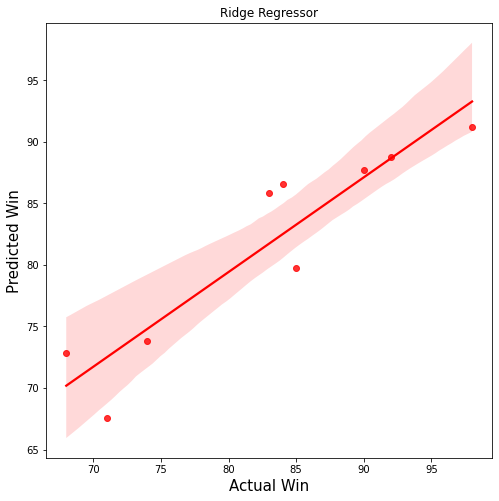

In [299]:
#Let us visualise the result
plt.figure(figsize=(8,8))
sns.regplot(y_test,predicted,color='r')
plt.xlabel('Actual Win',fontsize=15)
plt.ylabel('Predicted Win',fontsize=15)
plt.title("Ridge Regressor")
plt.show()

# Concluding Remarks
We predicted the outcomes of MLB matches by collecting the match data of 30 teams in the 2014 season using different Regression Models.

The prediction accuracies of these models were then compared.

The prediction results indicated that Ridge model achieved higher prediction accuracy.
